In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('usersTable.csv')
heavy_users = pd.read_csv('heavy_users.csv')


In [3]:
df_all = df.merge(heavy_users.drop_duplicates(), on='user_id', 
                   how='left', indicator=True)
not_heavy = df_all[df_all._merge=='left_only']# removing the right side of the join
not_heavy =not_heavy.drop(['_merge','session_duration','Ntask','Unnamed: 0','Unnamed: 1'], axis=1)


In [4]:
npArray = df.drop(['Continent', 'user_id'], axis=1).values
not_heavy_V = not_heavy.drop(['Continent', 'user_id','cohort_id'], axis=1).values


In [5]:
not_heavy_V

array([[  6.        ,  20.33333333, 945.        ,  42.63852814],
       [  7.        ,   3.85714286, 137.28571429,  24.7952381 ],
       [  1.        ,   2.        ,  13.        ,   6.5       ],
       ...,
       [  1.        ,   5.        , 118.        ,  23.6       ],
       [  1.        ,  16.        , 475.        ,  29.6875    ],
       [  1.        ,  10.        , 627.        ,  62.7       ]])

In [6]:
scaler = StandardScaler()
scaler.fit(not_heavy_V)
dfN = scaler.transform(not_heavy_V)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dfN)

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
lables=kmeans.predict(dfN)


In [10]:
not_heavy['kmeans'] = lables

In [11]:
not_heavy["kmeans"].value_counts()

0    3551
1    1231
2      31
Name: kmeans, dtype: int64

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pcas = pca.fit_transform(dfN)
pcas

array([[ 0.4460992 , -0.41694142],
       [-1.10860741,  0.04104887],
       [-1.46585535, -0.30755636],
       ...,
       [-1.12817587, -0.22501616],
       [-0.29581477, -0.56616317],
       [-0.18075049,  0.01977587]])

In [185]:
pcas[:,1].shape

(4906L,)

In [210]:
not_heavy["pca1"] = pcas[:,0]
not_heavy["pca2"] = pcas[:,1]
not_heavy.head(5)

,user_id,Nsessions,Continent,cohort_id,AVG_Task_Session,AVG_length_Session,AVG_dwell_Session,kmeans,pca1,pca2
0,27,6,Europe,1,20.333333,945.000000,42.638528,1,0.446099,-0.416941
2,35,7,North America,4,3.857143,137.285714,24.795238,1,-1.108607,0.041049
3,54,1,North America,1,2.000000,13.000000,6.500000,1,-1.465855,-0.307556
4,59,1,Europe,2,9.000000,1437.000000,159.666667,0,1.188238,1.127609
5,65,1,North America,5,10.000000,868.000000,86.800000,1,0.207064,0.284560


In [27]:
df[df["kmeans"]==0].describe()

KeyError: 'kmeans'

In [188]:
df[df["kmeans"]==1].describe()

,user_id,Unnamed: 1,Nsessions,cohort_id,AVG_Task_Session,AVG_length_Session,AVG_dwell_Session,kmeans,pca1,pca2
count,3.803000e+03,3803.0,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.0,3803.000000,3803.000000
mean,1.480086e+06,0.0,2.799106,2.586642,8.410382,402.612901,45.513384,1.0,-0.542622,-0.070223
std,6.557381e+05,0.0,5.697728,1.665806,8.066833,347.547885,33.142650,0.0,0.553654,0.579654
min,2.700000e+01,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,-1.382657,-2.391540
25%,1.259166e+06,0.0,1.000000,1.000000,3.000000,112.900000,24.601974,1.0,-0.980593,-0.470676
50%,1.886009e+06,0.0,1.000000,3.000000,5.800000,314.000000,40.555556,1.0,-0.610366,-0.094534
75%,1.912272e+06,0.0,2.000000,4.000000,11.000000,626.566667,61.820982,1.0,-0.146808,0.256799
max,1.928360e+06,0.0,74.000000,5.000000,72.500000,1627.500000,206.500000,1.0,0.939554,2.820388


In [189]:
df[df["kmeans"]==2].describe()

,user_id,Unnamed: 1,Nsessions,cohort_id,AVG_Task_Session,AVG_length_Session,AVG_dwell_Session,kmeans,pca1,pca2
count,3.100000e+01,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000
mean,1.061941e+06,0.0,169.709677,2.741935,11.898727,1103.226299,108.263557,2.0,1.404076,5.862549
std,7.857569e+05,0.0,85.004782,1.672677,9.726709,736.859601,77.794087,0.0,1.210877,3.182141
min,1.230000e+02,0.0,90.000000,0.000000,1.184524,56.928571,21.798515,2.0,-0.644193,1.673205
25%,1.918125e+05,0.0,106.500000,2.000000,4.489232,469.169730,50.209925,2.0,0.454020,3.627502
50%,1.304474e+06,0.0,140.000000,3.000000,9.508197,905.233333,91.034273,2.0,1.391033,4.996169
75%,1.844318e+06,0.0,208.000000,4.000000,14.943483,1779.263234,135.936269,2.0,2.315063,7.698665
max,1.903025e+06,0.0,461.000000,5.000000,40.503650,2925.304348,294.325733,2.0,3.942637,15.883225


In [190]:
df["AVG_length_Session"].value_counts()

0.000000       419
147.000000      10
103.000000      10
87.000000        9
88.000000        9
77.000000        9
189.000000       8
23.000000        8
60.000000        8
75.000000        8
235.000000       8
170.000000       8
151.000000       8
179.000000       7
501.000000       7
214.000000       7
150.000000       7
91.000000        7
71.000000        7
114.000000       7
81.000000        7
456.000000       7
274.000000       7
109.000000       7
66.000000        7
96.000000        7
521.000000       7
140.000000       7
110.000000       7
333.000000       7
              ... 
1237.500000      1
1192.500000      1
2216.000000      1
469.857143       1
634.250000       1
994.000000       1
339.000000       1
530.666667       1
329.000000       1
729.000000       1
33.333333        1
1765.000000      1
1351.000000      1
1150.250000      1
592.500000       1
1242.500000      1
114.519231       1
668.333333       1
302.500000       1
1967.000000      1
411.500000       1
2099.500000 

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [33]:
plt.scatter(not_havy.pca1, not_havy.pca2,c=kmeans.labels_ )
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'pca1'

In [219]:
pd.tools.plotting.parallel_coordinates(data, 'kmeans')

AttributeError: 'module' object has no attribute 'tools'

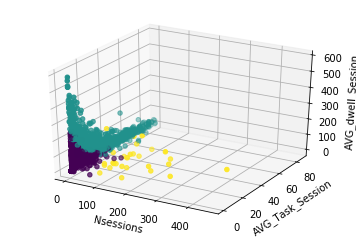

In [14]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(not_heavy['Nsessions'])
y = np.array(not_heavy['AVG_Task_Session'])
z = np.array(not_heavy['AVG_dwell_Session'])

ax.scatter(x,y,z,  marker='o', c=not_heavy["kmeans"])

ax.set_xlabel('Nsessions')
ax.set_ylabel('AVG_Task_Session')
ax.set_zlabel('AVG_dwell_Session')
plt.show()



In [15]:
not_heavy['Continent_code'] = not_heavy['Continent'].astype('category').cat.codes
not_heavy.Continent_code.value_counts()

3    2419
2    1652
4     326
1     289
5     102
0      25
Name: Continent_code, dtype: int64

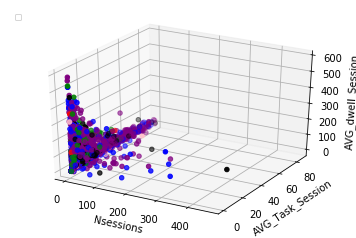

In [61]:
import matplotlib

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(not_heavy['Nsessions'])
y = np.array(not_heavy['AVG_Task_Session'])
z = np.array(not_heavy['AVG_dwell_Session'])

colors = ['red','green','blue','purple','black','pink']

line = ax.scatter(x,y,z,  marker='o', c=not_heavy["Continent_code"],cmap=matplotlib.colors.ListedColormap(colors))
#line = ax.scatter(x,y,z,  marker='o', c=not_heavy["Continent_code"][not_heavy['Continent_code'] == 1])

ax.set_xlabel('Nsessions')
ax.set_ylabel('AVG_Task_Session')
ax.set_zlabel('AVG_dwell_Session')
plt.legend(loc='upper left',fontsize=8)

plt.show()


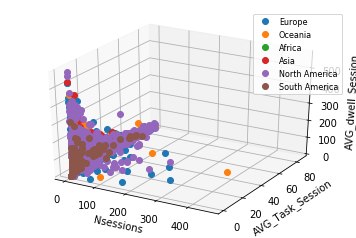

In [71]:
import matplotlib

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(not_heavy['Nsessions'])
y = np.array(not_heavy['AVG_Task_Session'])
z = np.array(not_heavy['AVG_dwell_Session'])
L = not_heavy["Continent"]
names = set(L)
for name in names:
    cond = L == name
    plt.plot(x[cond], y[cond],z[cond], linestyle='none', marker='o', label=name)
ax.set_xlabel('Nsessions')
ax.set_ylabel('AVG_Task_Session')
ax.set_zlabel('AVG_dwell_Session')
plt.legend(loc='upper right',fontsize=8)

plt.show()
